# Content and Objective

+ Show effect of several exemplary systems
+ Impulse response, in- and output signal, as well as spectra are shown

# Importing and Plotting Options

In [2]:
import numpy as np

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters and input signal

In [4]:
# define parameters
t_min=-10.0
t_max=10.0    

# sampled version 
t_s = 1.0

t_samp = np.arange(t_min, t_max, t_s)

x_samp = (signal.gausspulse(t_samp/3, 1, retenv=1))[1] 
x_samp = x_samp * np.sqrt( 1 / sum(x_samp**2) )

# Define impulse responses and generate output signals

In [5]:
# define several impulse responses
K = 10
length = 20

h_1 = np.zeros( length )
h_1[K] = 1

h_2 = np.zeros(l ength )
h_2[ : K ] = 1
h_2 /= np.linalg.norm(h_2)

# get outputs
y_1 = np.convolve( x_samp, h_1 )
y_2 = np.convolve( x_samp, h_2 )   

In [9]:
# determine spectra
N_fft = 512
X = np.fft.fftshift( np.fft.fft( x_samp, N_fft))
Y_1 = np.fft.fftshift( np.fft.fft( y_1, N_fft))
Y_2 = np.fft.fftshift( np.fft.fft( y_2, N_fft))

f_Nyquist = 1 / (2.0 * t_s )
f = np.arange( -f_Nyquist, f_Nyquist, 2 * f_Nyquist / N_fft)

# Plotting

Text(0.5, 0, '$f/\\mathrm{Hz}$')

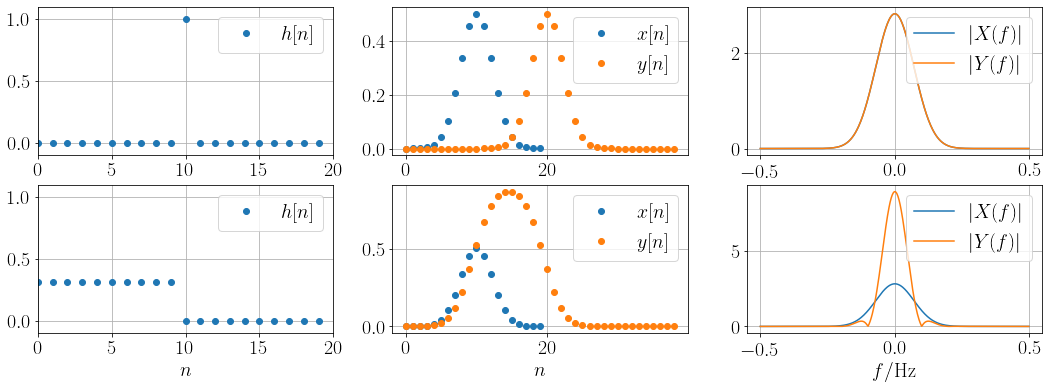

In [10]:
plt.figure(1)
plt.clf()

plt.subplot(231)
plt.plot( np.arange(len(h_1)), h_1, 'o', label='$h[n]$')
plt.grid(True)
plt.axis([0, length, -.1, 1.1])
plt.legend( loc = 'upper right')

plt.subplot(232)
plt.plot( np.arange(len(x_samp)), x_samp, 'o', label='$x[n]$')    
plt.plot( np.arange(len(y_1)), y_1, 'o', label='$y[n ]$')
plt.grid(True)
plt.legend( loc = 'upper right')

plt.subplot(233)
plt.plot(f, np.abs(X), label='$|X(f)|$')     
plt.plot(f, np.abs(Y_1), label='$|Y(f)|$') 
plt.grid(True)
plt.legend(loc='upper right')        
#plt.title('$|X(f)|, |Y(f)|$')

plt.subplot(234)
plt.plot( np.arange(len(h_2)), h_2, 'o', label='$h[n]$')
plt.grid(True)
plt.axis([0, length, -.1, 1.1])
plt.xlabel('$n$')     
plt.legend( loc = 'upper right')

plt.subplot(235)
plt.plot( np.arange(len(x_samp)), x_samp, 'o', label='$x[n]$')    
plt.plot( np.arange(len(y_2)), y_2, 'o', label='$y[n ]$')
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('$n$') 

plt.subplot(236)
plt.plot(f, np.abs(X), label='$|X(f)|$')     
plt.plot(f, np.abs(Y_2), label='$|Y(f)|$') 
plt.grid(True)
plt.legend(loc='upper right')    
plt.xlabel('$f/\mathrm{Hz}$')    